In [22]:
# Load the datasets
import pandas as pd

# Import necessary visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Paths to the datasets
train_path = 'titanic_train.csv'
test_path = 'titanic_test.csv'

# Load the datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [3]:
# Check the first few rows of the training dataset to understand its structure
train_df.head(), train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

## Exploratory Data Analysis (EDA)

**Survival Distribution:**

The survival distribution shows a significant class imbalance, with fewer passengers surviving the Titanic disaster compared to those who did not.

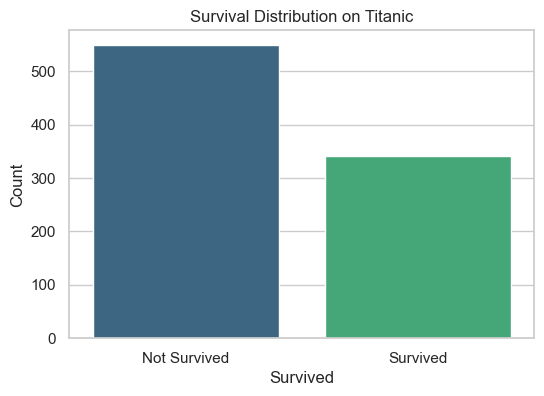

In [5]:
# Plot the survival distribution
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Survived', palette='viridis')
plt.title('Survival Distribution on Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

#### Feature Analysis and Correlation with Survival

**1. Passenger Class (Pclass):**

- *Hypothesis*: Higher-class passengers were more likely to survive due to better access to lifeboats.

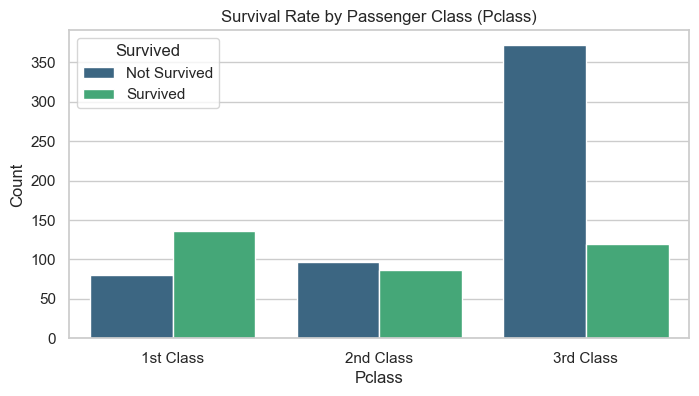

In [7]:
# Plot survival rate by Pclass
plt.figure(figsize=(8, 4))
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival Rate by Passenger Class (Pclass)')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()

The analysis confirms that passengers in higher classes (1st and 2nd) were more likely to survive than those in the 3rd class.

**2. Sex:**

- *Hypothesis*: Women were prioritized over men for lifeboats, leading to a higher survival rate for female passengers.

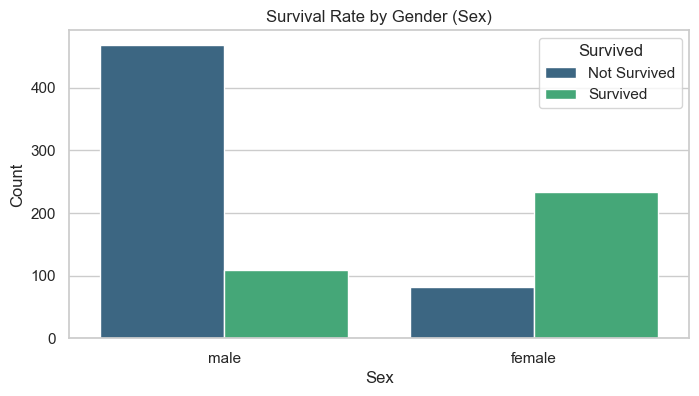

In [9]:
# Plot survival rate by Sex
plt.figure(figsize=(8, 4))
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival Rate by Gender (Sex)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()

The survival rate by gender reveals that women were much more likely to survive than men.

**3. Age:**

- *Hypothesis*: Children and younger passengers had a higher chance of survival.

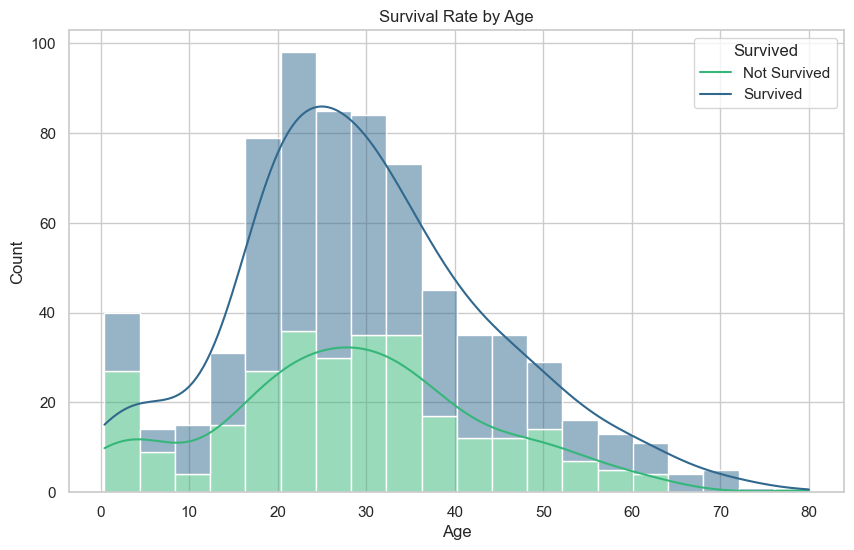

In [10]:
# Plot survival rate by Age
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', kde=True, palette='viridis', bins=20)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()

The age analysis indicates that children (ages 0-10) had a relatively higher survival rate, while passengers aged between 20 and 40 had a lower survival rate.

**4. SibSp (Siblings/Spouses Aboard):**

- *Hypothesis*: Passengers with a manageable number of family members aboard (e.g., 1-2 siblings/spouses) might have higher survival rates.

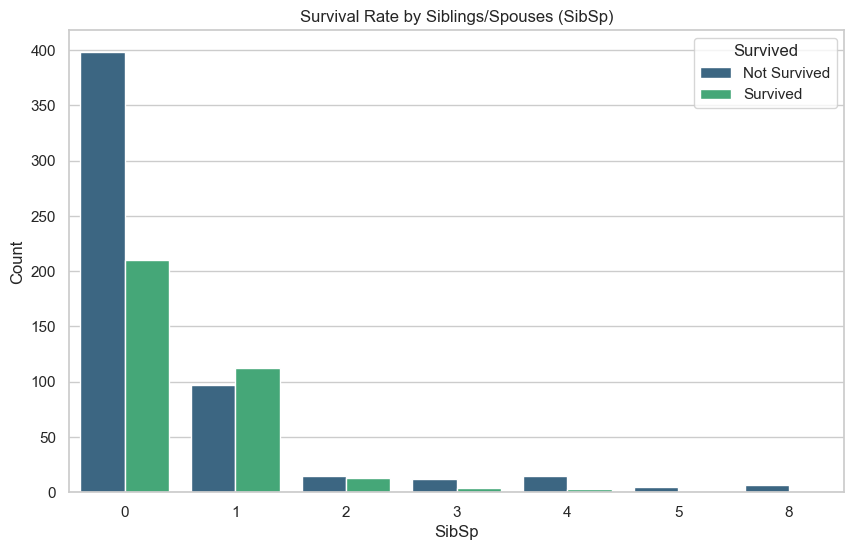

In [11]:
# Plot survival rate by SibSp
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='SibSp', hue='Survived', palette='viridis')
plt.title('Survival Rate by Siblings/Spouses (SibSp)')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()

The SibSp analysis shows:

- Passengers with 1-2 siblings/spouses had higher survival rates.
- Those with no siblings/spouses or many (≥3) siblings/spouses had lower survival rates.

**5. Parch (Parents/Children Aboard):**

- *Hypothesis*: Passengers traveling with parents or children might have higher survival rates.

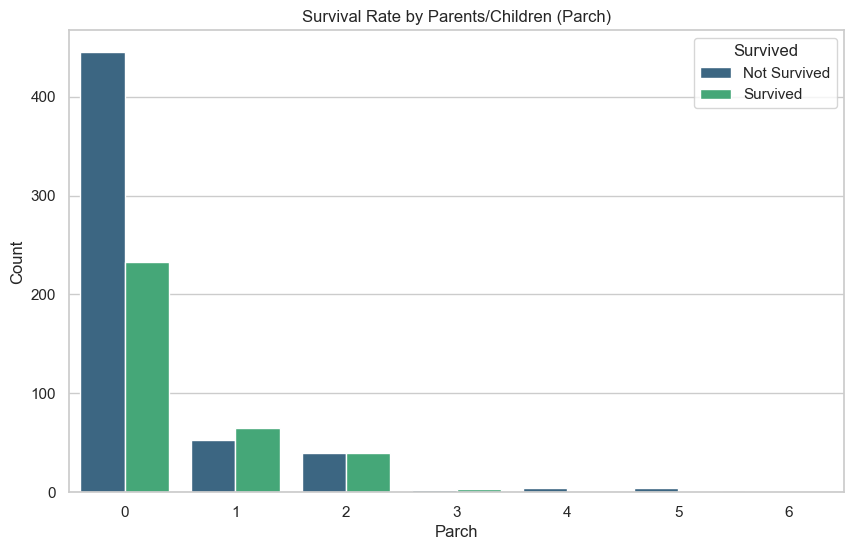

In [12]:
# Plot survival rate by Parch
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Parch', hue='Survived', palette='viridis')
plt.title('Survival Rate by Parents/Children (Parch)')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()

The Parch analysis indicates:

- Passengers with 1-3 parents/children aboard had higher survival rates.
- 1Those with no or many parents/children (≥4) had lower survival rates.

**6. Embarked:**

- *Hypothesis*: Passengers from certain embarkation ports may have different survival rates due to socioeconomic factors.

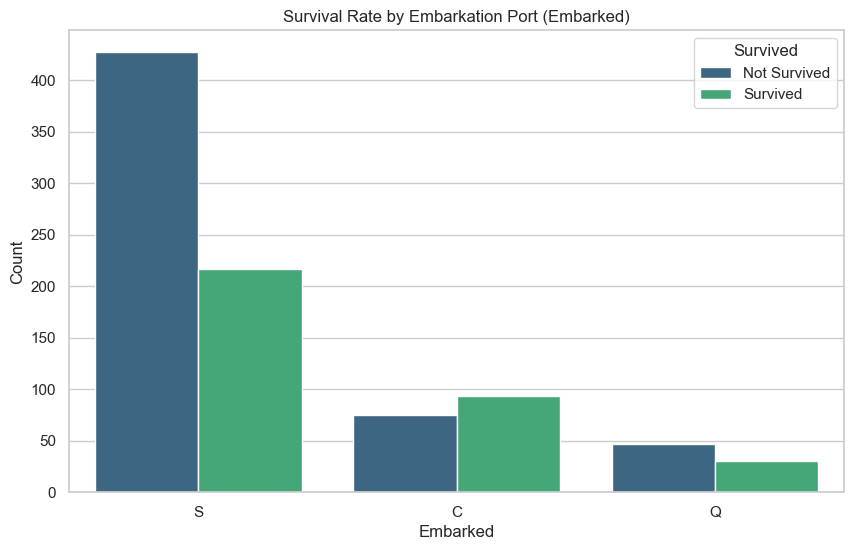

In [13]:
# Plot survival rate by Embarked
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Embarked', hue='Survived', palette='viridis')
plt.title('Survival Rate by Embarkation Port (Embarked)')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()

The analysis of survival rates by embarkation port shows:

- Passengers who embarked at Cherbourg (C) had the highest survival rates, potentially due to a higher proportion of 1st-class passengers.
- Passengers from Southampton (S) and Queenstown (Q) had lower survival rates.

## Feature Engineering and Data Preprocessing

**1. Missing Value Treatment:**

- Age: Replace missing values with median age.
- Embarked: Replace missing values with the most common port (mode).
- Fare: Replace missing values with median fare.
- Cabin: Due to extensive missing data, this feature will be dropped.

In [14]:
# Handling missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

**2. Additional Features:**

- Family Size: Combine SibSp and Parch to create a FamilySize feature.
- Alone Status: Determine whether a passenger is alone or with family.

In [15]:
# Creating additional features
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)

**3. Feature Encoding:**

- Categorical Variables: Convert Sex and Embarked to numerical using one-hot encoding.

In [16]:
# Dropping unnecessary columns
train_df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# One-hot encoding categorical features
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Checking the cleaned dataset
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,2,0,True,False,True
1,2,1,1,38.0,1,0,71.2833,2,0,False,False,False
2,3,1,3,26.0,0,0,7.9250,1,1,False,False,True
3,4,1,1,35.0,1,0,53.1000,2,0,False,False,True
4,5,0,3,35.0,0,0,8.0500,1,1,True,False,True


- The dataset now contains numerical and one-hot encoded features.
- Remaining Columns: `PassengerId`, `Survived`, `Pclass`, `Age`, `SibSp`, `Parch`, `Fare`, `FamilySize`, `IsAlone`, `Sex_male`, `Embarked_Q`, `Embarked_S`.

#### Preparing the Test Dataset

In [17]:
# Handle missing values in the test dataset
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [18]:
# Create additional features
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

In [19]:
# Drop unnecessary columns
test_df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# One-hot encoding categorical features
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

In [20]:
# Ensure all columns in the test dataset match the training dataset
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

# Remove the target column from the test dataset
test_df.drop('Survived', axis=1, inplace=True)

In [21]:
# Align test dataset columns with the training dataset
test_df = test_df[train_df.columns.drop('Survived')]

# Check the cleaned test dataset
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,True,True,False
1,893,3,47.0,1,0,7.0000,2,0,False,False,True
2,894,2,62.0,0,0,9.6875,1,1,True,True,False
3,895,3,27.0,0,0,8.6625,1,1,True,False,True
4,896,3,22.0,1,1,12.2875,3,0,False,False,True


## Model Development

In [23]:
# Split the training data
X_train = train_df.drop(['PassengerId', 'Survived'], axis=1)
y_train = train_df['Survived']

In [24]:
# Initialize classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

In [25]:
# Perform k-fold cross-validation (k=10)
dt_cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=10, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='accuracy')


In [26]:
# Compute average cross-validation scores
dt_cv_accuracy = dt_cv_scores.mean()
rf_cv_accuracy = rf_cv_scores.mean()

In [27]:
dt_cv_accuracy, rf_cv_accuracy

(0.7789887640449437, 0.8103995006242197)

#### Model Evaluation Results with K-Fold Cross-Validation (K=10)

**1. Decision Tree Classifier:**
- **Average Accuracy:** Approximately 77.9%

**2. Random Forest Classifier:**
- **Average Accuracy:** Approximately 81.0%

The Random Forest model performs better than the Decision Tree model, with a higher average accuracy across the 10-fold cross-validation. This result is expected due to Random Forest's inherent ability to manage overfitting by averaging multiple decision trees trained on different parts of the same training set.

In [28]:
# Fit the models on the entire training dataset
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Predict on the test dataset
X_test = test_df.drop(['PassengerId'], axis=1)
dt_predictions = dt_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

In [30]:
# Add predictions to the test dataframe for analysis
test_df['Survived_DT'] = dt_predictions
test_df['Survived_RF'] = rf_predictions

In [31]:
# Prepare submission files for each model
submission_dt = test_df[['PassengerId', 'Survived_DT']].rename(columns={'Survived_DT': 'Survived'})
submission_rf = test_df[['PassengerId', 'Survived_RF']].rename(columns={'Survived_RF': 'Survived'})

In [32]:
submission_dt.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [33]:
submission_rf.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


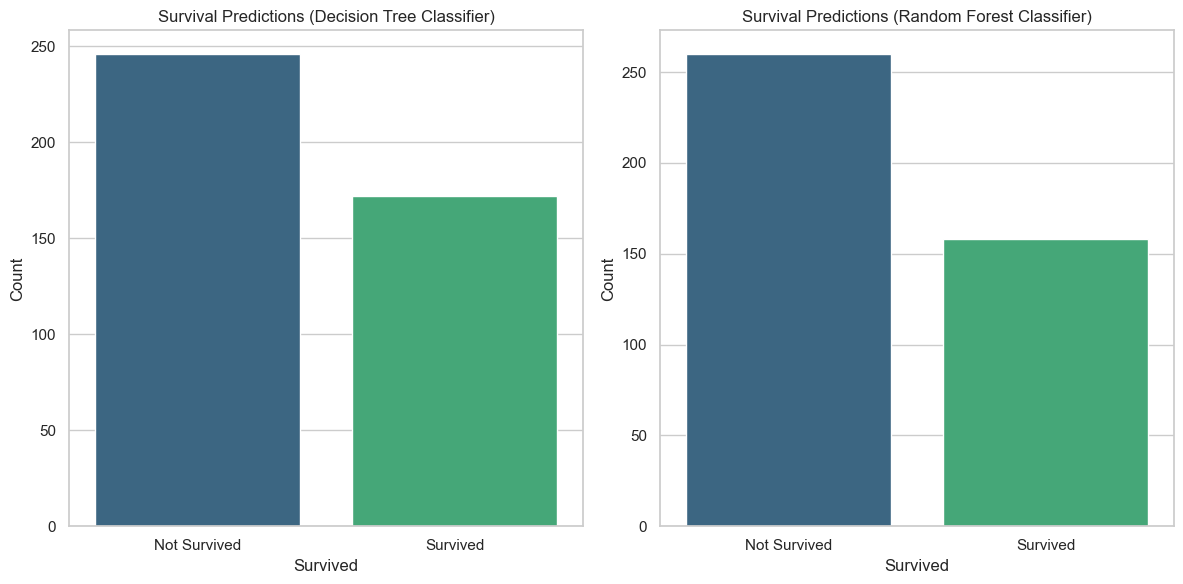

In [34]:
# Visualize key findings using bar plots
plt.figure(figsize=(12, 6))

# Decision Tree Predictions
plt.subplot(1, 2, 1)
sns.countplot(x='Survived_DT', data=test_df, palette='viridis')
plt.title('Survival Predictions (Decision Tree Classifier)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])

# Random Forest Predictions
plt.subplot(1, 2, 2)
sns.countplot(x='Survived_RF', data=test_df, palette='viridis')
plt.title('Survival Predictions (Random Forest Classifier)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])

plt.tight_layout()
plt.show()

### Titanic Survival Prediction Analysis Insights

**1. Exploratory Data Analysis:**
   - **Survival Distribution:** Around 38.4% of the passengers survived, revealing a class imbalance between those who survived and those who didn't.
   - **Passenger Class (Pclass):** Higher-class passengers (1st and 2nd class) had a much higher survival rate than 3rd-class passengers.
   - **Gender (Sex):** Females had a significantly higher survival rate (74%) compared to males (19%).
   - **Age:** Children aged 0-10 had a higher survival rate, while those aged between 20 and 40 had lower survival rates.
   - **Family Factors:** Passengers with 1-2 siblings/spouses or parents/children aboard were more likely to survive. Those traveling alone or with many family members had lower survival rates.

**2. Data Preprocessing:**
   - **Missing Values:** Age, Fare, and Embarked were imputed using the median or mode values.
   - **Feature Engineering:** Additional features were created, such as `FamilySize` and `IsAlone`.
   - **Categorical Encoding:** One-hot encoding was applied to categorical features like Sex and Embarked, ensuring consistent representation across training and test datasets.

**3. Model Development and Evaluation:**
   - **Decision Tree Classifier:**
     - **Cross-Validation Accuracy:** Approximately 77.9%.
     - **Test Predictions:** Predicted more passengers as survived compared to Random Forest.
   - **Random Forest Classifier:**
     - **Cross-Validation Accuracy:** Approximately 81.0%.
     - **Test Predictions:** Produced fewer false positives, demonstrating better performance.

**4. Visualization of Model Predictions:**
   - **Decision Tree Predictions:**
     - Predicted survival distribution: 74.5% not survived vs. 25.5% survived.
   - **Random Forest Predictions:**
     - Predicted survival distribution: 78.1% not survived vs. 21.9% survived.
   - Both models predicted more passengers as not survived, consistent with training data.

### Conclusion
- The Random Forest model outperformed the Decision Tree model, providing better accuracy and fewer false positives.
- Key features influencing survival include Passenger Class (Pclass), Gender (Sex), Age, and Family Size.